# SDC-System-Integration Generative Adversarial Network (GAN) Classifier
## For new v1.2 simulator

In [1]:
# import some useful modules

%matplotlib inline

import pickle as pkl
import time

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2

from os.path import isfile, isdir
from tqdm import tqdm

from IPython.display import display

## Import our data set (Just the Simulator)

In [2]:
incsv1 = '../../data/collections/new_sim/session1.csv'
incsv2 = '../../data/collections/new_sim/session2.csv'
incsv3 = '../../data/collections/mysample01/session1.csv'
incsv4 = '../../data/collections/mysample02/session2.csv'
incsv5 = '../../data/collections/mysample03/session1.csv'
incsv6 = '../../data/collections/mysample03/session2.csv'
incsv7 = '../../data/collections/mysample03/session3.csv'
incsv8 = '../../data/collections/mysample03/session4.csv'
incsv9 = '../../data/collections/mysample03/session5.csv'
incsv10 = '../../data/collections/mysample03/session6.csv'
incsv11 = '../../data/collections/mysample03/session7.csv'
incsv12 = '../../data/collections/mysample03/session8.csv'
incsv13 = '../../data/collections/mysample03/session9.csv'
incsv14 = '../../data/collections/mysample03/session10.csv'
incsv15 = '../../data/collections/mysample04/session1.csv'
incsv16 = '../../data/collections/mysample05/session1.csv'

sample1 = pd.read_csv(incsv1, header=0, sep=',')
sample1 = sample1.drop('x', axis=1)
sample1 = sample1.drop('y', axis=1)
sample1 = sample1.drop('z', axis=1)
sample1 = sample1.drop('ax', axis=1)
sample1 = sample1.drop('ay', axis=1)
sample1 = sample1.drop('az', axis=1)
sample1 = sample1.drop('aw', axis=1)
sample2 = pd.read_csv(incsv2, header=0, sep=',')
sample2 = sample2.drop('x', axis=1)
sample2 = sample2.drop('y', axis=1)
sample2 = sample2.drop('z', axis=1)
sample2 = sample2.drop('ax', axis=1)
sample2 = sample2.drop('ay', axis=1)
sample2 = sample2.drop('az', axis=1)
sample2 = sample2.drop('aw', axis=1)
sample3 = pd.read_csv(incsv3, header=0, sep=',')
sample3 = sample3.drop('x', axis=1)
sample3 = sample3.drop('y', axis=1)
sample3 = sample3.drop('z', axis=1)
sample3 = sample3.drop('ax', axis=1)
sample3 = sample3.drop('ay', axis=1)
sample3 = sample3.drop('az', axis=1)
sample3 = sample3.drop('aw', axis=1)
sample4 = pd.read_csv(incsv4, header=0, sep=',')
sample4 = sample4.drop('x', axis=1)
sample4 = sample4.drop('y', axis=1)
sample4 = sample4.drop('z', axis=1)
sample4 = sample4.drop('ax', axis=1)
sample4 = sample4.drop('ay', axis=1)
sample4 = sample4.drop('az', axis=1)
sample4 = sample4.drop('aw', axis=1)
sample5 = pd.read_csv(incsv5, header=0, sep=',')
sample5 = sample5.drop('x', axis=1)
sample5 = sample5.drop('y', axis=1)
sample5 = sample5.drop('z', axis=1)
sample5 = sample5.drop('ax', axis=1)
sample5 = sample5.drop('ay', axis=1)
sample5 = sample5.drop('az', axis=1)
sample5 = sample5.drop('aw', axis=1)
sample6 = pd.read_csv(incsv6, header=0, sep=',')
sample6 = sample6.drop('x', axis=1)
sample6 = sample6.drop('y', axis=1)
sample6 = sample6.drop('z', axis=1)
sample6 = sample6.drop('ax', axis=1)
sample6 = sample6.drop('ay', axis=1)
sample6 = sample6.drop('az', axis=1)
sample6 = sample6.drop('aw', axis=1)
sample7 = pd.read_csv(incsv7, header=0, sep=',')
sample7 = sample7.drop('x', axis=1)
sample7 = sample7.drop('y', axis=1)
sample7 = sample7.drop('z', axis=1)
sample7 = sample7.drop('ax', axis=1)
sample7 = sample7.drop('ay', axis=1)
sample7 = sample7.drop('az', axis=1)
sample7 = sample7.drop('aw', axis=1)
sample8 = pd.read_csv(incsv8, header=0, sep=',')
sample8 = sample8.drop('x', axis=1)
sample8 = sample8.drop('y', axis=1)
sample8 = sample8.drop('z', axis=1)
sample8 = sample8.drop('ax', axis=1)
sample8 = sample8.drop('ay', axis=1)
sample8 = sample8.drop('az', axis=1)
sample8 = sample8.drop('aw', axis=1)
sample9 = pd.read_csv(incsv9, header=0, sep=',')
sample9 = sample9.drop('x', axis=1)
sample9 = sample9.drop('y', axis=1)
sample9 = sample9.drop('z', axis=1)
sample9 = sample9.drop('ax', axis=1)
sample9 = sample9.drop('ay', axis=1)
sample9 = sample9.drop('az', axis=1)
sample9 = sample9.drop('aw', axis=1)
sample10 = pd.read_csv(incsv10, header=0, sep=',')
sample10 = sample10.drop('x', axis=1)
sample10 = sample10.drop('y', axis=1)
sample10 = sample10.drop('z', axis=1)
sample10 = sample10.drop('ax', axis=1)
sample10 = sample10.drop('ay', axis=1)
sample10 = sample10.drop('az', axis=1)
sample10 = sample10.drop('aw', axis=1)
sample11 = pd.read_csv(incsv11, header=0, sep=',')
sample11 = sample11.drop('x', axis=1)
sample11 = sample11.drop('y', axis=1)
sample11 = sample11.drop('z', axis=1)
sample11 = sample11.drop('ax', axis=1)
sample11 = sample11.drop('ay', axis=1)
sample11 = sample11.drop('az', axis=1)
sample11 = sample11.drop('aw', axis=1)
sample12 = pd.read_csv(incsv12, header=0, sep=',')
sample12 = sample12.drop('x', axis=1)
sample12 = sample12.drop('y', axis=1)
sample12 = sample12.drop('z', axis=1)
sample12 = sample12.drop('ax', axis=1)
sample12 = sample12.drop('ay', axis=1)
sample12 = sample12.drop('az', axis=1)
sample12 = sample12.drop('aw', axis=1)
sample13 = pd.read_csv(incsv13, header=0, sep=',')
sample13 = sample13.drop('x', axis=1)
sample13 = sample13.drop('y', axis=1)
sample13 = sample13.drop('z', axis=1)
sample13 = sample13.drop('ax', axis=1)
sample13 = sample13.drop('ay', axis=1)
sample13 = sample13.drop('az', axis=1)
sample13 = sample13.drop('aw', axis=1)
sample14 = pd.read_csv(incsv14, header=0, sep=',')
sample14 = sample14.drop('x', axis=1)
sample14 = sample14.drop('y', axis=1)
sample14 = sample14.drop('z', axis=1)
sample14 = sample14.drop('ax', axis=1)
sample14 = sample14.drop('ay', axis=1)
sample14 = sample14.drop('az', axis=1)
sample14 = sample14.drop('aw', axis=1)
sample15 = pd.read_csv(incsv15, header=0, sep=',')
sample15 = sample15.drop('x', axis=1)
sample15 = sample15.drop('y', axis=1)
sample15 = sample15.drop('z', axis=1)
sample15 = sample15.drop('ax', axis=1)
sample15 = sample15.drop('ay', axis=1)
sample15 = sample15.drop('az', axis=1)
sample15 = sample15.drop('aw', axis=1)
sample16 = pd.read_csv(incsv16, header=0, sep=',')
sample16 = sample16.drop('x', axis=1)
sample16 = sample16.drop('y', axis=1)
sample16 = sample16.drop('z', axis=1)
sample16 = sample16.drop('ax', axis=1)
sample16 = sample16.drop('ay', axis=1)
sample16 = sample16.drop('az', axis=1)
sample16 = sample16.drop('aw', axis=1)

frames = [ sample1, sample2, sample3, sample4, sample5, sample6, sample7, sample8,sample9, sample10, sample11, sample12, sample13,sample14, sample15, sample16 ]
samples = pd.concat(frames)
samples.columns = ['X','y']

samples.head()

X  y
0  'data/collections/new_sim/session1_0.jpg'  0
1  'data/collections/new_sim/session1_1.jpg'  0
2  'data/collections/new_sim/session1_2.jpg'  0
3  'data/collections/new_sim/session1_3.jpg'  0
4  'data/collections/new_sim/session1_4.jpg'  0

In [3]:
samples.describe()

y
count  2889.000000
mean      0.992039
std       0.945323
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       2.000000

In [4]:
# number of samples
n_samples = len(samples.index)
# calculate the number of RED light: 0
n_red = len(samples[(samples.y==0)])
# calculate the number of YELLOW light: 1
n_yellow = len(samples[(samples.y==1)])
# calculate the number of GREEN light: 2
n_green = len(samples[(samples.y==2)])
# calculate the number of UNKNOWN: 4
n_unknown = len(samples[(samples.y==4)])

# Print the results
print ("Total number of samples: {}".format(n_samples))
print ("Number of samples red: {}".format(n_red))
print ("Number of samples green: {}".format(n_green))
print ("Number of samples yellow: {}".format(n_yellow))
print ("Number of samples unknown: {}".format(n_unknown))

Total number of samples: 2889
Number of samples red: 1302
Number of samples green: 1279
Number of samples yellow: 308
Number of samples unknown: 0


In [5]:
msk = np.random.rand(len(samples)) < 0.8
trainset = samples[msk]
testset = samples[~msk]

# Show the results of the split
print ("Training set has {} samples.".format(trainset.shape[0]))
print ("Testing set has {} samples.".format(testset.shape[0]))

print (trainset.head())
print (testset.head())

Training set has 2275 samples.
Testing set has 614 samples.
                                           X  y
0  'data/collections/new_sim/session1_0.jpg'  0
2  'data/collections/new_sim/session1_2.jpg'  0
3  'data/collections/new_sim/session1_3.jpg'  0
4  'data/collections/new_sim/session1_4.jpg'  0
5  'data/collections/new_sim/session1_5.jpg'  0
                                             X  y
1    'data/collections/new_sim/session1_1.jpg'  0
10  'data/collections/new_sim/session1_10.jpg'  2
12  'data/collections/new_sim/session1_12.jpg'  2
15  'data/collections/new_sim/session1_15.jpg'  2
16  'data/collections/new_sim/session1_16.jpg'  2


In [6]:
def getImage(imagefile):
    imagepath = '../../'+imagefile.replace("'", "")
    image = cv2.imread(imagepath, 1)
    row, col, ch = image.shape
    if row != 600 or col != 800:
        image = cv2.resize(image, (600, 800), interpolation=cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

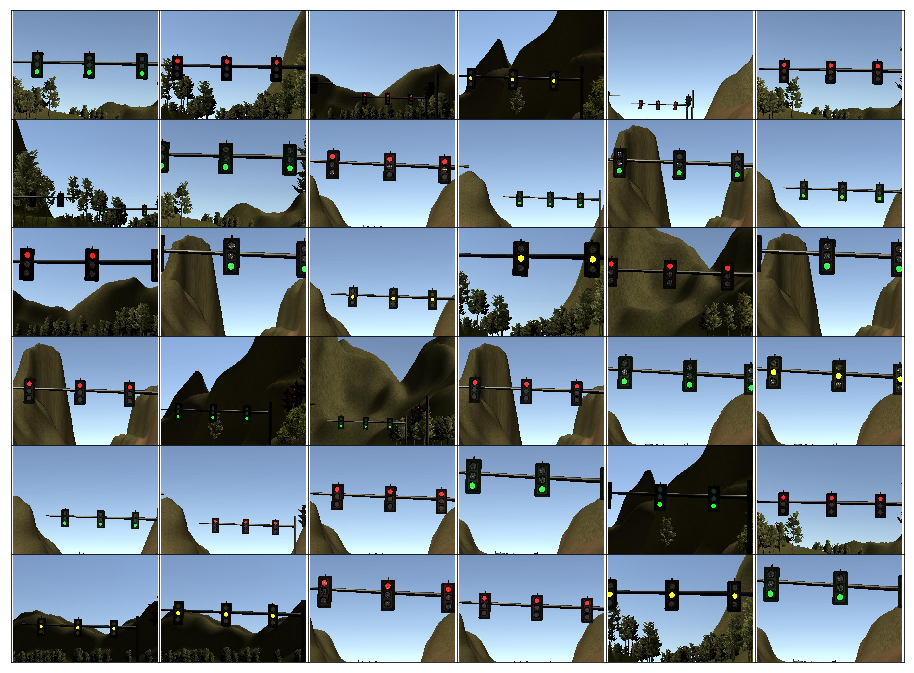

In [7]:
idx = np.random.randint(0, len(trainset['X']), size=36)
fig, axes = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(16,12),)
for ii, ax in zip(idx, axes.flatten()):
    ax.imshow(getImage(trainset['X'].iloc[ii]), aspect='equal')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)

## Preparing the data

In [8]:
def scale(x, feature_range=(-1, 1)):
    # scale to (0, 1)
    x = ((x - x.min())/(255 - x.min()))
    
    # scale to feature_range
    min, max = feature_range
    x = x * (max - min) + min
    return x

In [9]:
class Dataset:
    def __init__(self, train, test, val_frac=0.5, shuffle=False, scale_func=None):
        split_idx = int(len(test['y'])*(1 - val_frac))
        self.test_x, self.valid_x = test['X'][:split_idx], test['X'][split_idx:]
        self.test_y, self.valid_y = test['y'][:split_idx], test['y'][split_idx:]
        self.train_x, self.train_y = train['X'], train['y']
        self.label_mask = np.ones(len(self.train_y)+128)
        
        if scale_func is None:
            self.scaler = scale
        else:
            self.scaler = scale_func
        self.shuffle = shuffle
        
    def batches(self, batch_size, which_set="train"):
        x_name = which_set + "_x"
        y_name = which_set + "_y"
        
        num_examples = len(getattr(dataset, y_name))
        if self.shuffle:
            idx = np.arange(num_examples)
            np.random.shuffle(idx)
            setattr(dataset, x_name, getattr(dataset, x_name)[idx])
            setattr(dataset, y_name, getattr(dataset, y_name)[idx])
            if which_set == "train":
                dataset.label_mask = dataset.label_mask[idx]
        
        dataset_x = getattr(dataset, x_name)
        dataset_y = getattr(dataset, y_name)
        for ii in range(0, num_examples, batch_size):
            x = []
            y = []
            for j in range(batch_size):
                x.append(self.scaler(getImage(dataset_x.iloc[(ii+j)%num_examples])))
                y.append(dataset_y.iloc[(ii+j)%num_examples])
            x = np.array(x).reshape(-1, 600, 800, 3)
            y = np.array(y).reshape(-1, 1)
            
            if which_set == "train":
                # When we use the data for training, we need to include
                # the label mask, so we can pretend we don't have access
                # to some of the labels, as an exercise of our semi-supervised
                # learning ability
                yield x, y, self.label_mask[ii:ii+batch_size]
            else:
                yield x, y

In [10]:
def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, real_dim[0], real_dim[1], real_dim[2]), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    y = tf.placeholder(tf.int32, (None), name='y')
    label_mask = tf.placeholder(tf.int32, (None), name='label_mask')
    
    return inputs_real, inputs_z, y, label_mask

In [11]:
def generator(z, output_dim, reuse=False, alpha=0.2, training=True, size_mult=128):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4 * 4 * size_mult * 4)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, size_mult * 4))
        x1 = tf.layers.batch_normalization(x1, training=training)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, size_mult * 2, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=training)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, size_mult, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=training)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, output_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)
        
        return out

In [12]:
def discriminator(x, reuse=False, alpha=0.2, drop_rate=0., num_classes=10, size_mult=64):
    with tf.variable_scope('discriminator', reuse=reuse):
        x = tf.layers.dropout(x, rate=drop_rate/2.5)
        
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(x, size_mult, 3, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        relu1 = tf.layers.dropout(relu1, rate=drop_rate)
        
        x2 = tf.layers.conv2d(relu1, size_mult, 3, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * x2, x2)
        
        
        x3 = tf.layers.conv2d(relu2, size_mult, 3, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        relu3 = tf.layers.dropout(relu3, rate=drop_rate)
        
        x4 = tf.layers.conv2d(relu3, 2 * size_mult, 3, strides=1, padding='same')
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        
        x5 = tf.layers.conv2d(relu4, 2 * size_mult, 3, strides=1, padding='same')
        bn5 = tf.layers.batch_normalization(x5, training=True)
        relu5 = tf.maximum(alpha * bn5, bn5)
        
        x6 = tf.layers.conv2d(relu5, 2 * size_mult, 3, strides=2, padding='same')
        bn6 = tf.layers.batch_normalization(x6, training=True)
        relu6 = tf.maximum(alpha * bn6, bn6)
        relu6 = tf.layers.dropout(relu6, rate=drop_rate)
        
        x7 = tf.layers.conv2d(relu5, 2 * size_mult, 3, strides=1, padding='valid')
        # Don't use bn on this layer, because bn would set the mean of each feature
        # to the bn mu parameter.
        # This layer is used for the feature matching loss, which only works if
        # the means can be different when the discriminator is run on the data than
        # when the discriminator is run on the generator samples.
        relu7 = tf.maximum(alpha * x7, x7)
        
        # Flatten it by global average pooling
        features = tf.reduce_mean(relu7, (1, 2))
        
        # Set class_logits to be the inputs to a softmax distribution over the different classes
        class_logits = tf.layers.dense(features, num_classes + extra_class)
        
        
        # Set gan_logits such that P(input is real | input) = sigmoid(gan_logits).
        # Keep in mind that class_logits gives you the probability distribution over all the real
        # classes and the fake class. You need to work out how to transform this multiclass softmax
        # distribution into a binary real-vs-fake decision that can be described with a sigmoid.
        # Numerical stability is very important.
        # You'll probably need to use this numerical stability trick:
        # log sum_i exp a_i = m + log sum_i exp(a_i - m).
        # This is numerically stable when m = max_i a_i.
        # (It helps to think about what goes wrong when...
        #   1. One value of a_i is very large
        #   2. All the values of a_i are very negative
        # This trick and this value of m fix both those cases, but the naive implementation and
        # other values of m encounter various problems)
        
        if extra_class:
            real_class_logits, fake_class_logits = tf.split(class_logits, [num_classes, 1], 1)
            assert fake_class_logits.get_shape()[1] == 1, fake_class_logits.get_shape()
            fake_class_logits = tf.squeeze(fake_class_logits)
        else:
            real_class_logits = class_logits
            fake_class_logits = 0.
        
        mx = tf.reduce_max(real_class_logits, 1, keep_dims=True)
        stable_real_class_logits = real_class_logits - mx

        gan_logits = tf.log(tf.reduce_sum(tf.exp(stable_real_class_logits), 1)) + tf.squeeze(mx) - fake_class_logits
        
        out = tf.nn.softmax(class_logits)
        
        return out, class_logits, gan_logits, features

In [13]:
def model_loss(input_real, input_z, output_dim, y, num_classes, label_mask, alpha=0.2, drop_rate=0.):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param output_dim: The number of channels in the output image
    :param y: Integer class labels
    :param num_classes: The number of classes
    :param alpha: The slope of the left half of leaky ReLU activation
    :param drop_rate: The probability of dropping a hidden unit
    :return: A tuple of (discriminator loss, generator loss)
    """
    
    
    # These numbers multiply the size of each layer of the generator and the discriminator,
    # respectively. You can reduce them to run your code faster for debugging purposes.
    g_size_mult = 32
    d_size_mult = 64
    
    # Here we run the generator and the discriminator
    g_model = generator(input_z, output_dim, alpha=alpha, size_mult=g_size_mult)
    d_on_data = discriminator(input_real, alpha=alpha, drop_rate=drop_rate, size_mult=d_size_mult)
    d_model_real, class_logits_on_data, gan_logits_on_data, data_features = d_on_data
    d_on_samples = discriminator(g_model, reuse=True, alpha=alpha, drop_rate=drop_rate, size_mult=d_size_mult)
    d_model_fake, class_logits_on_samples, gan_logits_on_samples, sample_features = d_on_samples
    
    
    # Here we compute `d_loss`, the loss for the discriminator.
    # This should combine two different losses:
    #  1. The loss for the GAN problem, where we minimize the cross-entropy for the binary
    #     real-vs-fake classification problem.
    #  2. The loss for the SVHN digit classification problem, where we minimize the cross-entropy
    #     for the multi-class softmax. For this one we use the labels. Don't forget to ignore
    #     use `label_mask` to ignore the examples that we are pretending are unlabeled for the
    #     semi-supervised learning problem.
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=gan_logits_on_data,
                                                labels=tf.ones_like(gan_logits_on_data)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=gan_logits_on_samples,
                                                labels=tf.zeros_like(gan_logits_on_samples)))
    y = tf.squeeze(y)
    class_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=class_logits_on_data,
                                                                  labels=tf.one_hot(y, num_classes + extra_class,
                                                                                    dtype=tf.float32))
    class_cross_entropy = tf.squeeze(class_cross_entropy)
    label_mask = tf.squeeze(tf.to_float(label_mask))
    d_loss_class = tf.reduce_sum(label_mask * class_cross_entropy) / tf.maximum(1., tf.reduce_sum(label_mask))
    d_loss = d_loss_class + d_loss_real + d_loss_fake
    
    # Here we set `g_loss` to the "feature matching" loss invented by Tim Salimans at OpenAI.
    # This loss consists of minimizing the absolute difference between the expected features
    # on the data and the expected features on the generated samples.
    # This loss works better for semi-supervised learning than the tradition GAN losses.
    data_moments = tf.reduce_mean(data_features, axis=0)
    sample_moments = tf.reduce_mean(sample_features, axis=0)
    g_loss = tf.reduce_mean(tf.abs(data_moments - sample_moments))

    pred_class = tf.cast(tf.argmax(class_logits_on_data, 1), tf.int32, name="predict")
    eq = tf.equal(tf.squeeze(y), pred_class)
    correct = tf.reduce_sum(tf.to_float(eq))
    masked_correct = tf.reduce_sum(label_mask * tf.to_float(eq))
    
    return d_loss, g_loss, correct, masked_correct, g_model

In [14]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and biases to update. Get them separately for the discriminator and the generator
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    for t in t_vars:
        assert t in d_vars or t in g_vars

    # Minimize both players' costs simultaneously
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    shrink_lr = tf.assign(learning_rate, learning_rate * 0.9)
    
    return d_train_opt, g_train_opt, shrink_lr



In [15]:
class GAN:
    """
    A GAN model.
    :param real_size: The shape of the real data.
    :param z_size: The number of entries in the z code vector.
    :param learnin_rate: The learning rate to use for Adam.
    :param num_classes: The number of classes to recognize.
    :param alpha: The slope of the left half of the leaky ReLU activation
    :param beta1: The beta1 parameter for Adam.
    """
    def __init__(self, real_size, z_size, learning_rate, num_classes=10, alpha=0.2, beta1=0.5):
        tf.reset_default_graph()
        
        self.learning_rate = tf.Variable(learning_rate, trainable=False)
        self.input_real, self.input_z, self.y, self.label_mask = model_inputs(real_size, z_size)
        self.drop_rate = tf.placeholder_with_default(.5, (), "drop_rate")
        
        loss_results = model_loss(self.input_real, self.input_z,
                                              real_size[2], self.y, num_classes, label_mask=self.label_mask,
                                                                          alpha=0.2,
                                                           drop_rate=self.drop_rate)
        self.d_loss, self.g_loss, self.correct, self.masked_correct, self.samples = loss_results
        
        self.d_opt, self.g_opt, self.shrink_lr = model_opt(self.d_loss, self.g_loss, self.learning_rate, beta1)


In [16]:
def view_samples(epoch, samples, nrows, ncols, figsize=(8,6)):
    fig, axes = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols, 
                             sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.axis('off')
        img = ((img - img.min())*255 / (img.max() - img.min())).astype(np.uint8)
        ax.set_adjustable('box-forced')
        im = ax.imshow(img)
   
    plt.subplots_adjust(wspace=0, hspace=0)
    return fig, axes

In [17]:
def train(net, dataset, epochs, batch_size, figsize=(8,6), load=False):
    
    saver = tf.train.Saver()
    sample_z = np.random.normal(0, 1, size=(50, z_size))
    
    samples, train_accuracies, test_accuracies = [], [], []
    steps = 0

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        if load:
            saver.restore(sess, './checkpoints/generator.ckpt')
            print ("Model restored.")

        for e in range(epochs):
            print ("Epoch",e)
            
            t1e = time.time()
            num_examples = 0
            num_correct = 0
            for x, y, label_mask in dataset.batches(batch_size):
                assert 'int' in str(y.dtype)
                steps += 1
                num_examples += label_mask.sum()

                # Sample random noise for G
                batch_z = np.random.normal(0, 1, size=(batch_size, z_size))

                # Run optimizers
                t1 = time.time()
                _, _, correct = sess.run([net.d_opt, net.g_opt, net.masked_correct],
                                         feed_dict={net.input_real: x, net.input_z: batch_z,
                                                    net.y : y, net.label_mask : label_mask})
                t2 = time.time()
                num_correct += correct

            sess.run([net.shrink_lr])
            
            
            train_accuracy = num_correct / float(num_examples)
            
            print ("\t\tClassifier train accuracy: ", train_accuracy)
            
            num_examples = 0
            num_correct = 0
            for x, y in dataset.batches(batch_size, which_set="test"):
                assert 'int' in str(y.dtype)
                num_examples += x.shape[0]

                correct, = sess.run([net.correct], feed_dict={net.input_real: x,
                                                   net.y : y,
                                                   net.drop_rate: 0.})
                num_correct += correct
            
            test_accuracy = num_correct / float(num_examples)
            print ("\t\tClassifier test accuracy: ", test_accuracy)
            print ("\t\tStep time: ", t2 - t1)
            t2e = time.time()
            print ("\t\tEpoch time: ", t2e - t1e)
            
            
            gen_samples = sess.run(
                                   net.samples,
                                   feed_dict={net.input_z: sample_z})
            samples.append(gen_samples)
            _ = view_samples(-1, samples, 5, 10, figsize=figsize)
            plt.show()
            
            
            # Save history of accuracies to view after training
            train_accuracies.append(train_accuracy)
            test_accuracies.append(test_accuracy)
            

        saver.save(sess, './checkpoints/generator.ckpt')

    with open('samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    return train_accuracies, test_accuracies, samples

In [18]:
#!mkdir checkpoints

In [19]:
extra_class = 0
real_size = (600,800,3)
z_size = 100
learning_rate = 0.0001

net = GAN(real_size, z_size, learning_rate)


INFO:tensorflow:Restoring parameters from ./checkpoints/generator.ckpt
Model restored.
Epoch 0
		Classifier train accuracy:  0.368629173989
		Classifier test accuracy:  0.253246753247
		Step time:  0.10789775848388672
		Epoch time:  187.3346676826477


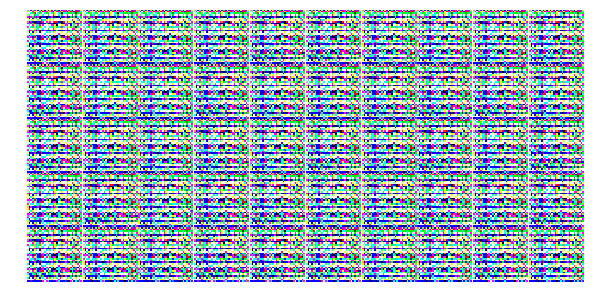

Epoch 1
		Classifier train accuracy:  0.552284710018
		Classifier test accuracy:  0.288961038961
		Step time:  0.10758590698242188
		Epoch time:  181.9385895729065


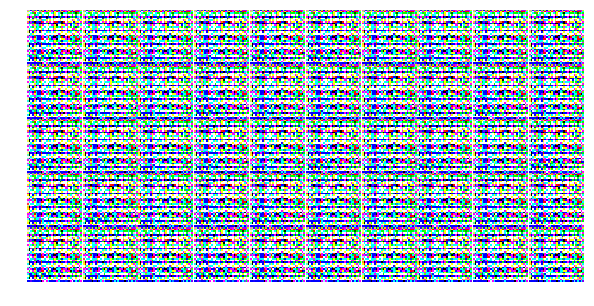

Epoch 2
		Classifier train accuracy:  0.654657293497
		Classifier test accuracy:  0.308441558442
		Step time:  0.1074216365814209
		Epoch time:  180.3934931755066


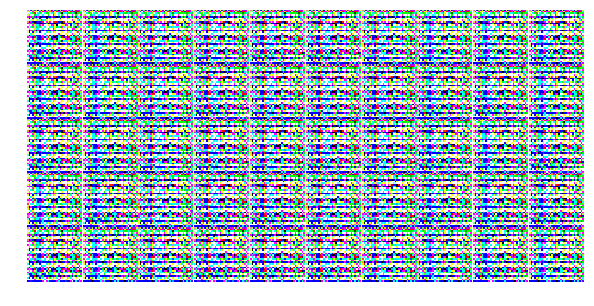

Epoch 3
		Classifier train accuracy:  0.701669595782
		Classifier test accuracy:  0.321428571429
		Step time:  0.10752463340759277
		Epoch time:  180.83614945411682


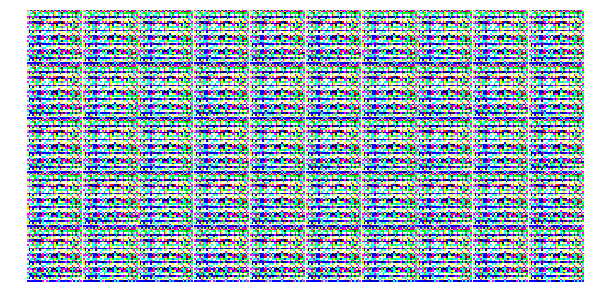

Epoch 4
		Classifier train accuracy:  0.7460456942
		Classifier test accuracy:  0.347402597403
		Step time:  0.11406397819519043
		Epoch time:  180.30685949325562


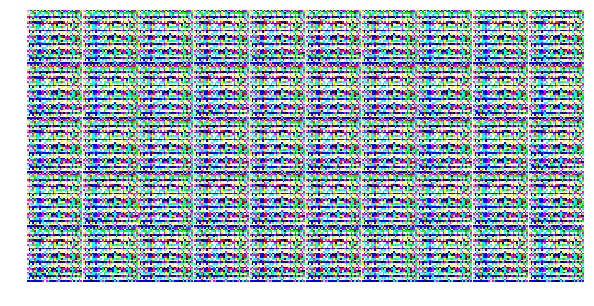

Epoch 5
		Classifier train accuracy:  0.770210896309
		Classifier test accuracy:  0.357142857143
		Step time:  0.10747671127319336
		Epoch time:  183.89186000823975


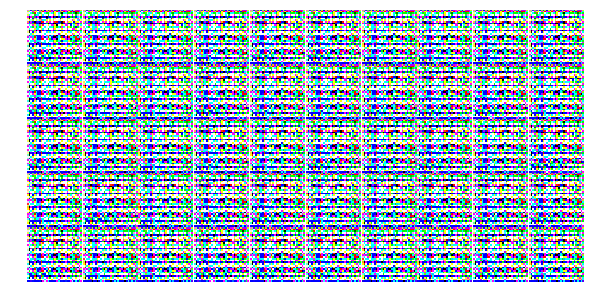

Epoch 6
		Classifier train accuracy:  0.78690685413
		Classifier test accuracy:  0.467532467532
		Step time:  0.1115424633026123
		Epoch time:  189.9233136177063


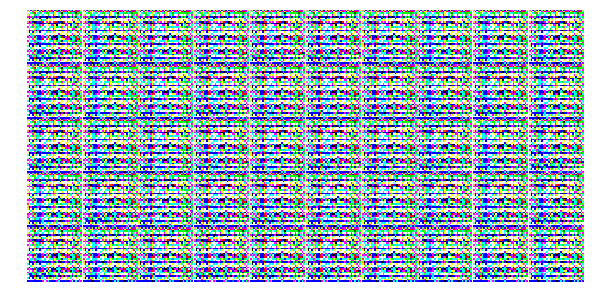

Epoch 7
		Classifier train accuracy:  0.797012302285
		Classifier test accuracy:  0.496753246753
		Step time:  0.11289286613464355
		Epoch time:  183.11478924751282


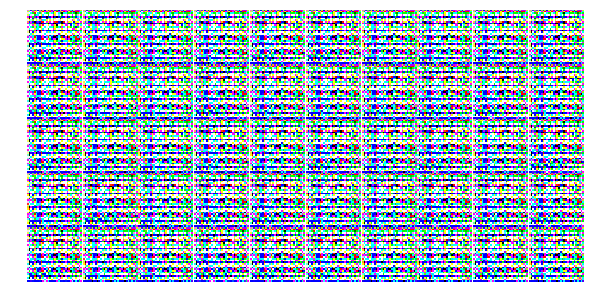

Epoch 8
		Classifier train accuracy:  0.806239015817
		Classifier test accuracy:  0.545454545455
		Step time:  0.10762190818786621
		Epoch time:  181.55422234535217


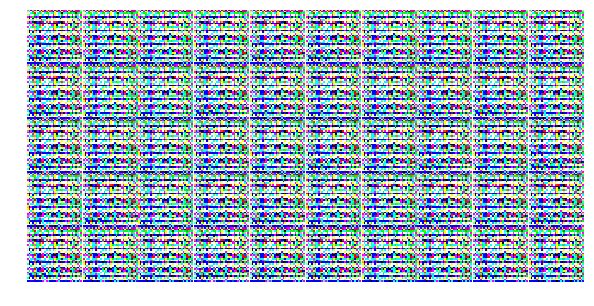

Epoch 9
		Classifier train accuracy:  0.805360281195
		Classifier test accuracy:  0.568181818182
		Step time:  0.10746431350708008
		Epoch time:  181.31114530563354


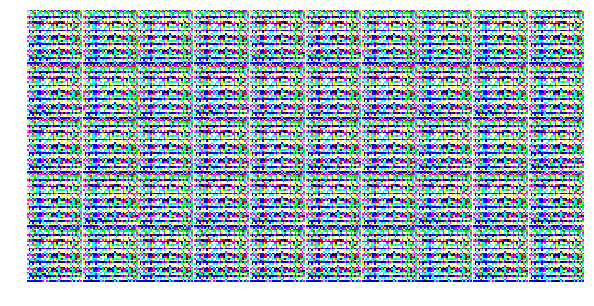

Epoch 10
		Classifier train accuracy:  0.805360281195
		Classifier test accuracy:  0.584415584416
		Step time:  0.1076204776763916
		Epoch time:  181.25426745414734


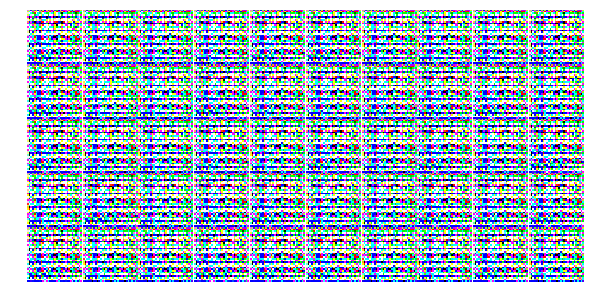

Epoch 11
		Classifier train accuracy:  0.809753954306
		Classifier test accuracy:  0.597402597403
		Step time:  0.10802674293518066
		Epoch time:  181.34517192840576


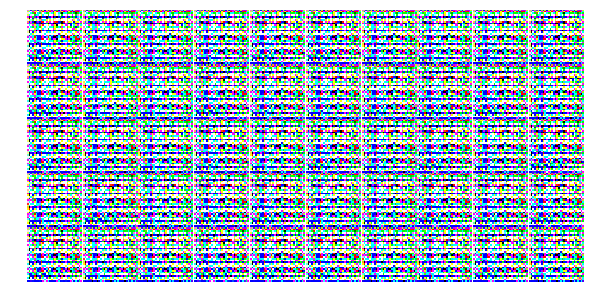

Epoch 12
		Classifier train accuracy:  0.809314586995
		Classifier test accuracy:  0.613636363636
		Step time:  0.10767030715942383
		Epoch time:  180.8716835975647


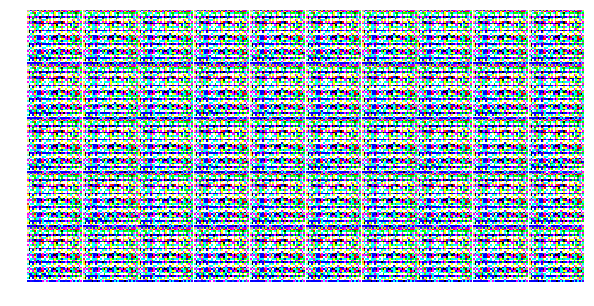

Epoch 13
		Classifier train accuracy:  0.810632688928
		Classifier test accuracy:  0.633116883117
		Step time:  0.1074073314666748
		Epoch time:  181.48167610168457


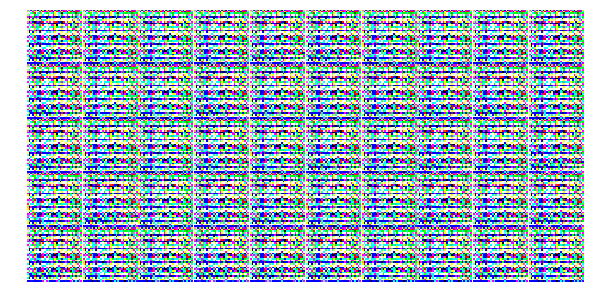

Epoch 14
		Classifier train accuracy:  0.812829525483
		Classifier test accuracy:  0.688311688312
		Step time:  0.11034250259399414
		Epoch time:  181.42299556732178


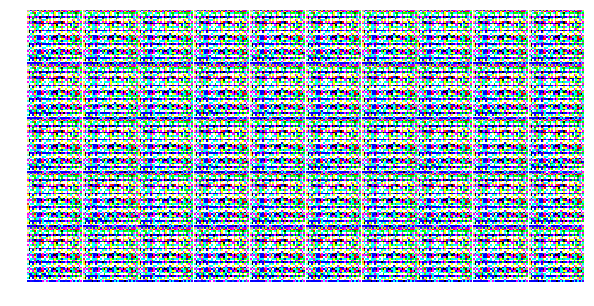

Epoch 15
		Classifier train accuracy:  0.816344463972
		Classifier test accuracy:  0.707792207792
		Step time:  0.10777139663696289
		Epoch time:  181.0520462989807


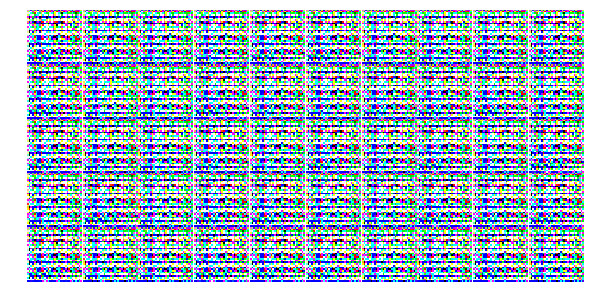

Epoch 16
		Classifier train accuracy:  0.818980667838
		Classifier test accuracy:  0.724025974026
		Step time:  0.11246085166931152
		Epoch time:  181.72886419296265


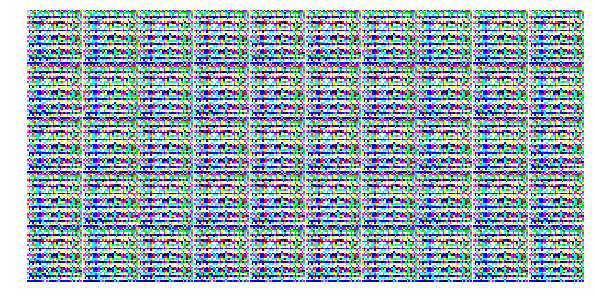

Epoch 17
		Classifier train accuracy:  0.820738137083
		Classifier test accuracy:  0.75
		Step time:  0.15374040603637695
		Epoch time:  222.82573914527893


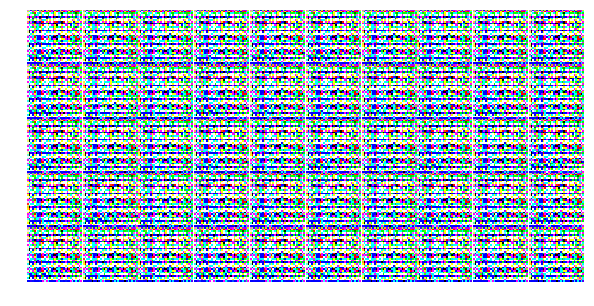

Epoch 18
		Classifier train accuracy:  0.829964850615
		Classifier test accuracy:  0.772727272727
		Step time:  0.10854291915893555
		Epoch time:  198.10404014587402


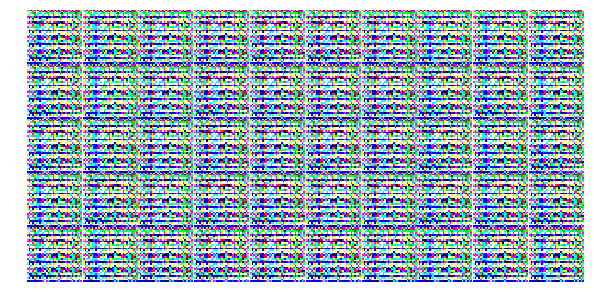

Epoch 19
		Classifier train accuracy:  0.831722319859
		Classifier test accuracy:  0.782467532468
		Step time:  0.10862326622009277
		Epoch time:  195.17277717590332


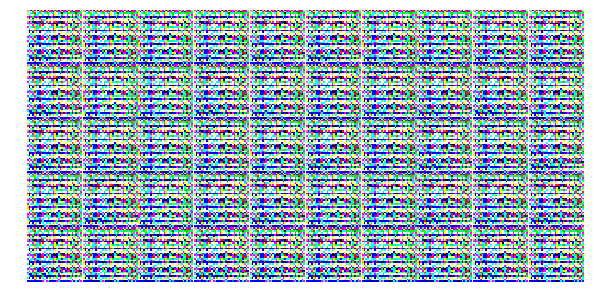

Epoch 20
		Classifier train accuracy:  0.833479789104
		Classifier test accuracy:  0.798701298701
		Step time:  0.10846757888793945
		Epoch time:  198.65998792648315


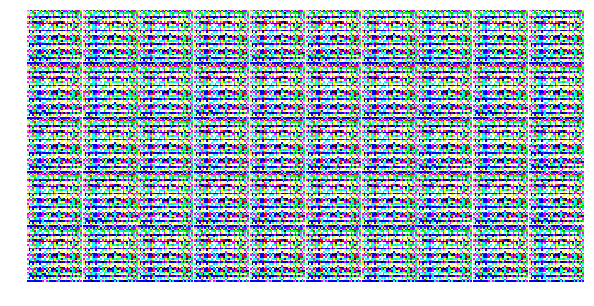

Epoch 21
		Classifier train accuracy:  0.838312829525
		Classifier test accuracy:  0.811688311688
		Step time:  0.11524748802185059
		Epoch time:  252.35572457313538


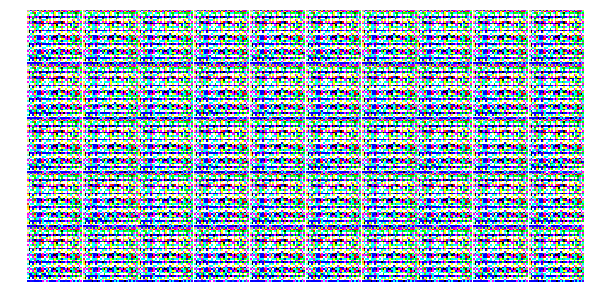

Epoch 22
		Classifier train accuracy:  0.838752196837
		Classifier test accuracy:  0.814935064935
		Step time:  0.10906410217285156
		Epoch time:  217.3304214477539


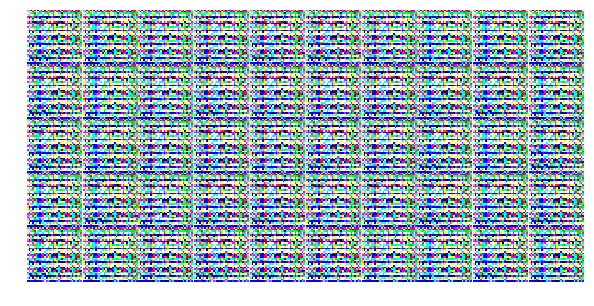

Epoch 23
		Classifier train accuracy:  0.840949033392
		Classifier test accuracy:  0.814935064935
		Step time:  0.1088418960571289
		Epoch time:  239.21094942092896


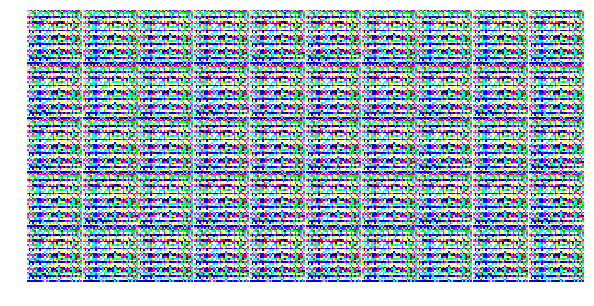

Epoch 24
		Classifier train accuracy:  0.842706502636
		Classifier test accuracy:  0.818181818182
		Step time:  0.10854363441467285
		Epoch time:  195.6862988471985


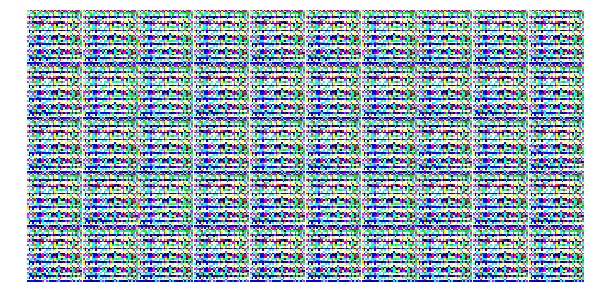

Epoch 25
		Classifier train accuracy:  0.84446397188
		Classifier test accuracy:  0.824675324675
		Step time:  0.10817170143127441
		Epoch time:  202.46674299240112


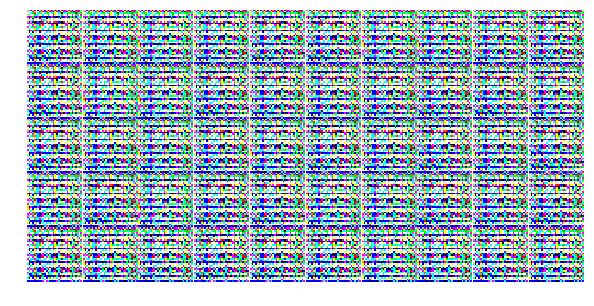

Epoch 26
		Classifier train accuracy:  0.846660808436
		Classifier test accuracy:  0.824675324675
		Step time:  0.10874772071838379
		Epoch time:  224.03854179382324


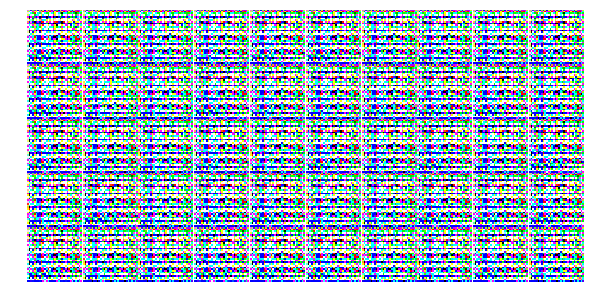

Epoch 27
		Classifier train accuracy:  0.849297012302
		Classifier test accuracy:  0.831168831169
		Step time:  0.11613655090332031
		Epoch time:  215.91867971420288


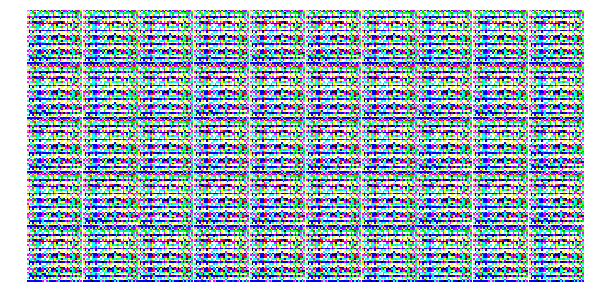

Epoch 28
		Classifier train accuracy:  0.851493848858
		Classifier test accuracy:  0.840909090909
		Step time:  0.10867094993591309
		Epoch time:  214.10654735565186


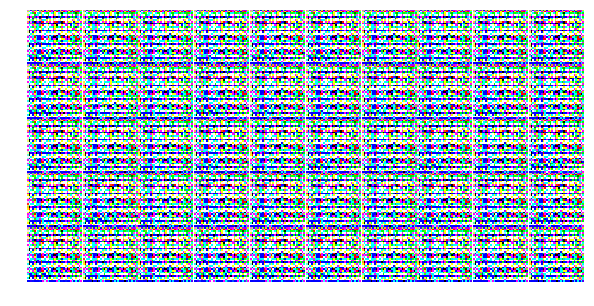

Epoch 29
		Classifier train accuracy:  0.851933216169
		Classifier test accuracy:  0.840909090909
		Step time:  0.10814261436462402
		Epoch time:  214.41166067123413


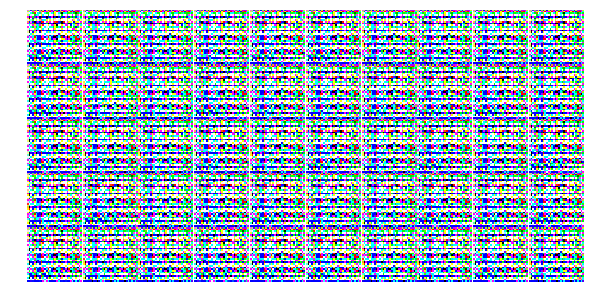

Epoch 30
		Classifier train accuracy:  0.853690685413
		Classifier test accuracy:  0.844155844156
		Step time:  0.11883068084716797
		Epoch time:  221.74979877471924


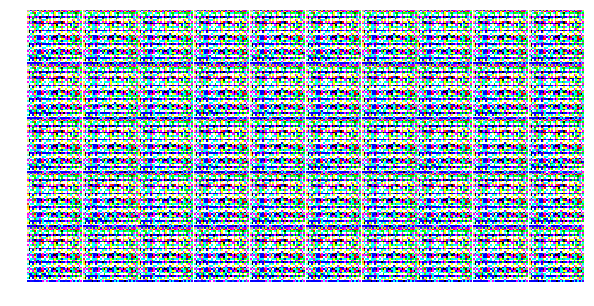

Epoch 31
		Classifier train accuracy:  0.855448154657
		Classifier test accuracy:  0.844155844156
		Step time:  0.1083216667175293
		Epoch time:  195.72306275367737


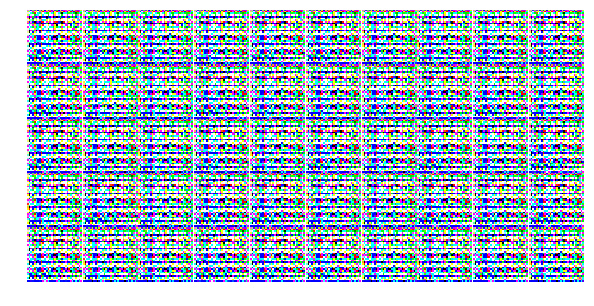

Epoch 32
		Classifier train accuracy:  0.855887521968
		Classifier test accuracy:  0.847402597403
		Step time:  0.10810136795043945
		Epoch time:  195.81672763824463


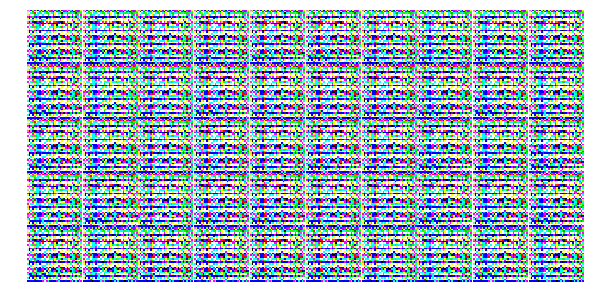

Epoch 33
		Classifier train accuracy:  0.856766256591
		Classifier test accuracy:  0.853896103896
		Step time:  0.10961198806762695
		Epoch time:  193.84419012069702


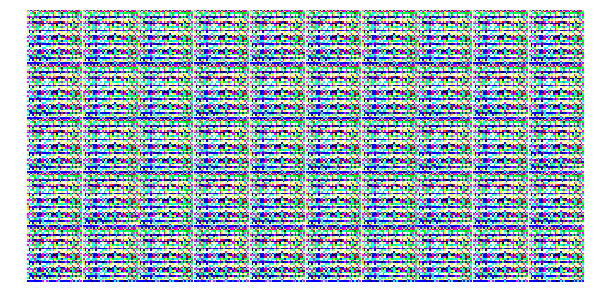

Epoch 34
		Classifier train accuracy:  0.857205623902
		Classifier test accuracy:  0.857142857143
		Step time:  0.1085202693939209
		Epoch time:  193.7938506603241


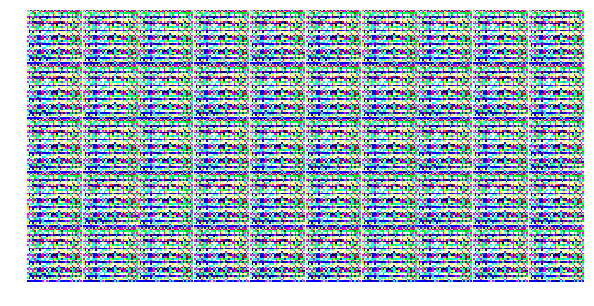

Epoch 35
		Classifier train accuracy:  0.858084358524
		Classifier test accuracy:  0.857142857143
		Step time:  0.11311864852905273
		Epoch time:  196.67051815986633


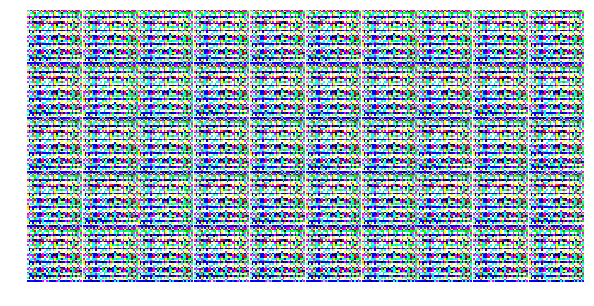

Epoch 36
		Classifier train accuracy:  0.859841827768
		Classifier test accuracy:  0.857142857143
		Step time:  0.10841846466064453
		Epoch time:  195.37760996818542


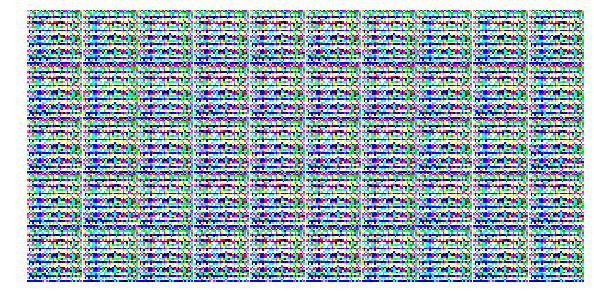

Epoch 37
		Classifier train accuracy:  0.86072056239
		Classifier test accuracy:  0.863636363636
		Step time:  0.10814714431762695
		Epoch time:  196.83357214927673


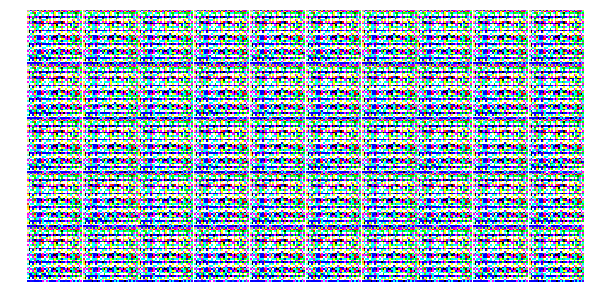

Epoch 38
		Classifier train accuracy:  0.861159929701
		Classifier test accuracy:  0.863636363636
		Step time:  0.10804176330566406
		Epoch time:  197.9992983341217


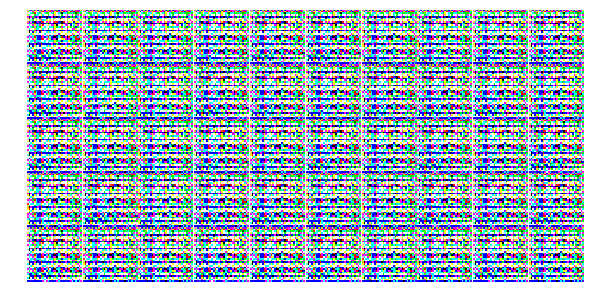

Epoch 39
		Classifier train accuracy:  0.861159929701
		Classifier test accuracy:  0.863636363636
		Step time:  0.10830330848693848
		Epoch time:  197.178941488266


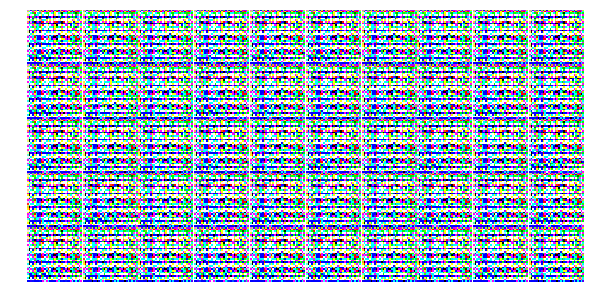

Epoch 40
		Classifier train accuracy:  0.862038664323
		Classifier test accuracy:  0.863636363636
		Step time:  0.1089022159576416
		Epoch time:  194.61480450630188


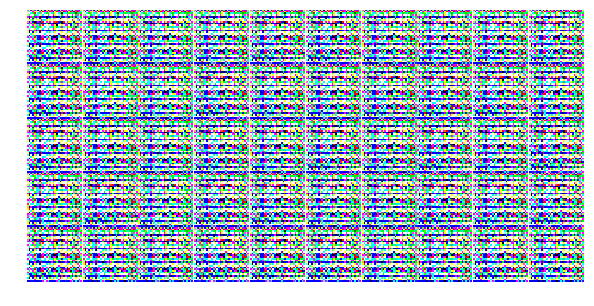

Epoch 41
		Classifier train accuracy:  0.862478031634
		Classifier test accuracy:  0.863636363636
		Step time:  0.10947728157043457
		Epoch time:  227.2008626461029


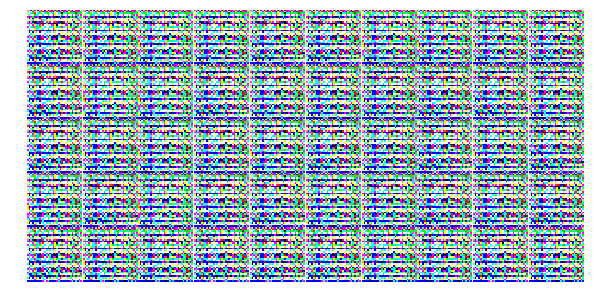

Epoch 42
		Classifier train accuracy:  0.863796133568
		Classifier test accuracy:  0.866883116883
		Step time:  0.10840630531311035
		Epoch time:  220.90580487251282


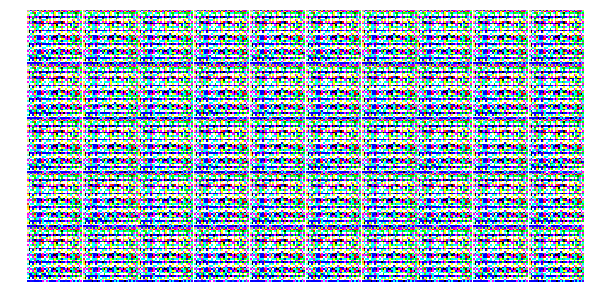

Epoch 43
		Classifier train accuracy:  0.864235500879
		Classifier test accuracy:  0.866883116883
		Step time:  0.11413764953613281
		Epoch time:  195.9560432434082


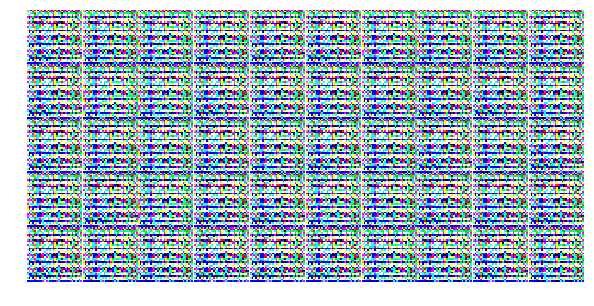

Epoch 44
		Classifier train accuracy:  0.863796133568
		Classifier test accuracy:  0.866883116883
		Step time:  0.10957622528076172
		Epoch time:  193.7006185054779


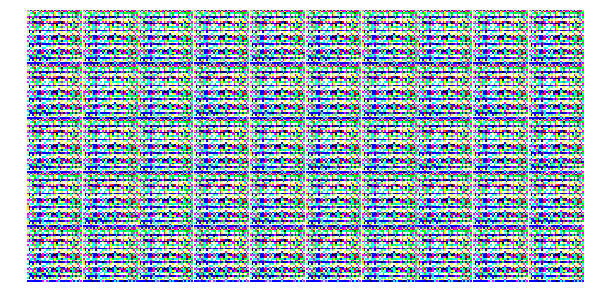

Epoch 45
		Classifier train accuracy:  0.865114235501
		Classifier test accuracy:  0.87012987013
		Step time:  0.10788679122924805
		Epoch time:  193.77066111564636


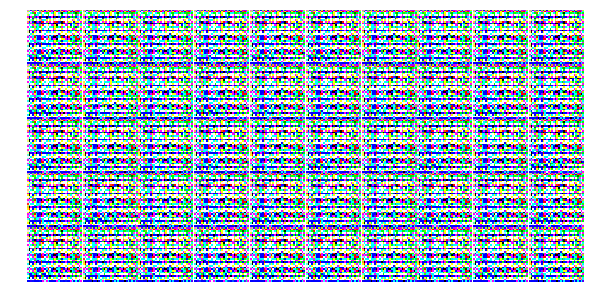

Epoch 46
		Classifier train accuracy:  0.865992970123
		Classifier test accuracy:  0.87012987013
		Step time:  0.10837841033935547
		Epoch time:  196.67775988578796


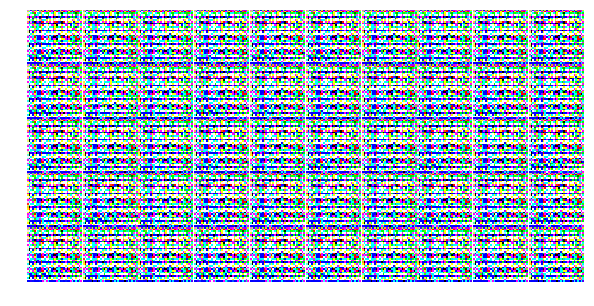

Epoch 47
		Classifier train accuracy:  0.865553602812
		Classifier test accuracy:  0.87012987013
		Step time:  0.10849428176879883
		Epoch time:  218.89243531227112


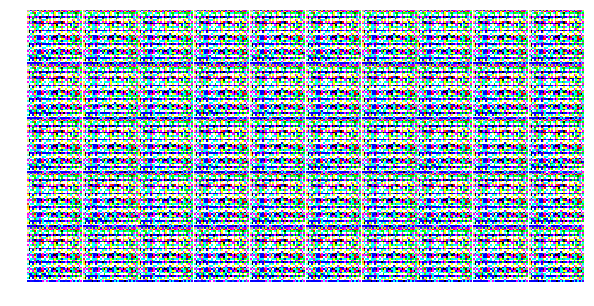

Epoch 48
		Classifier train accuracy:  0.865553602812
		Classifier test accuracy:  0.873376623377
		Step time:  0.10867571830749512
		Epoch time:  195.17725372314453


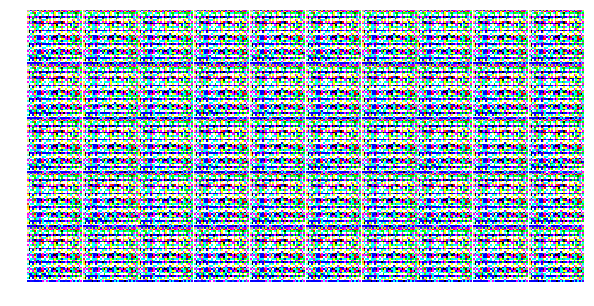

Epoch 49
		Classifier train accuracy:  0.865992970123
		Classifier test accuracy:  0.873376623377
		Step time:  0.10817074775695801
		Epoch time:  195.03085064888


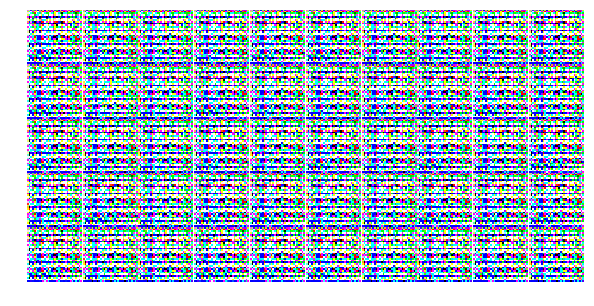

Epoch 50
		Classifier train accuracy:  0.865992970123
		Classifier test accuracy:  0.873376623377
		Step time:  0.1084754467010498
		Epoch time:  195.67921590805054


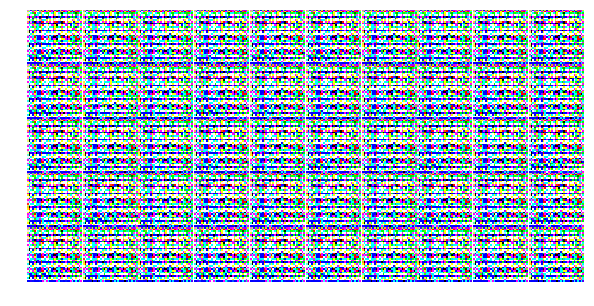

Epoch 51
		Classifier train accuracy:  0.865992970123
		Classifier test accuracy:  0.873376623377
		Step time:  0.10823440551757812
		Epoch time:  195.57866191864014


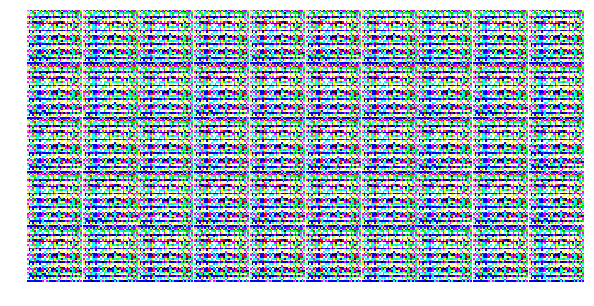

Epoch 52
		Classifier train accuracy:  0.865992970123
		Classifier test accuracy:  0.876623376623
		Step time:  0.10776329040527344
		Epoch time:  193.59224224090576


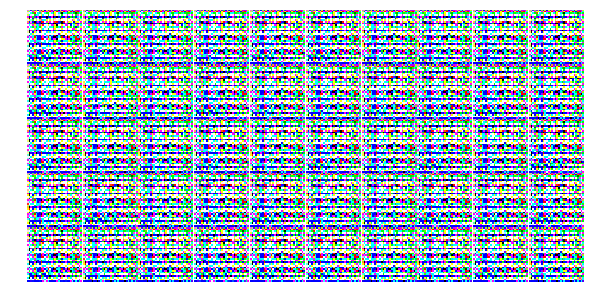

Epoch 53
		Classifier train accuracy:  0.865992970123
		Classifier test accuracy:  0.876623376623
		Step time:  0.10984110832214355
		Epoch time:  193.61270356178284


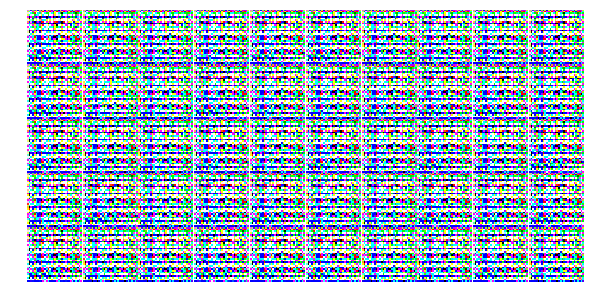

Epoch 54
		Classifier train accuracy:  0.866432337434
		Classifier test accuracy:  0.876623376623
		Step time:  0.10804963111877441
		Epoch time:  197.1608030796051


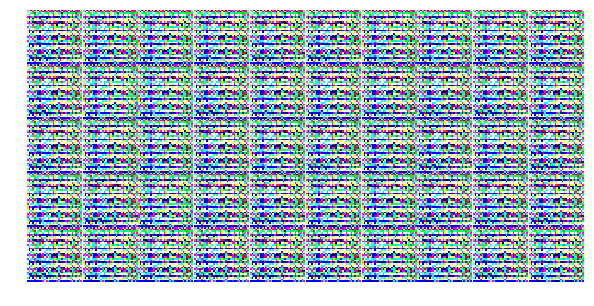

Epoch 55
		Classifier train accuracy:  0.866871704745
		Classifier test accuracy:  0.876623376623
		Step time:  0.10832667350769043
		Epoch time:  195.52419328689575


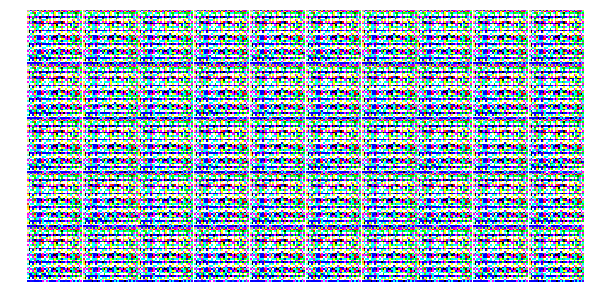

Epoch 56
		Classifier train accuracy:  0.866871704745
		Classifier test accuracy:  0.876623376623
		Step time:  0.10817790031433105
		Epoch time:  194.7548143863678


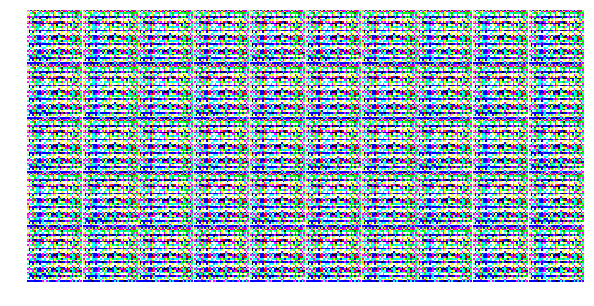

Epoch 57
		Classifier train accuracy:  0.866871704745
		Classifier test accuracy:  0.876623376623
		Step time:  0.1093440055847168
		Epoch time:  193.67824816703796


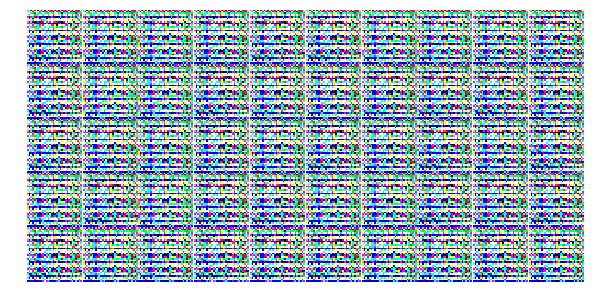

Epoch 58
		Classifier train accuracy:  0.867311072056
		Classifier test accuracy:  0.876623376623
		Step time:  0.10826396942138672
		Epoch time:  193.4632682800293


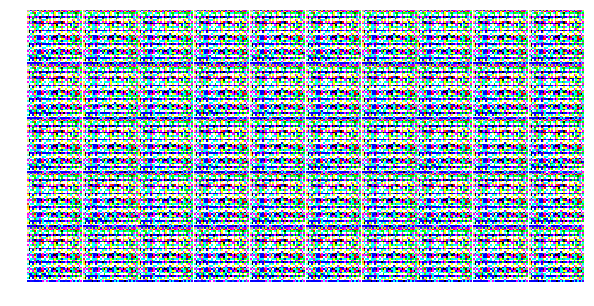

Epoch 59
		Classifier train accuracy:  0.867311072056
		Classifier test accuracy:  0.876623376623
		Step time:  0.10930991172790527
		Epoch time:  193.33660244941711


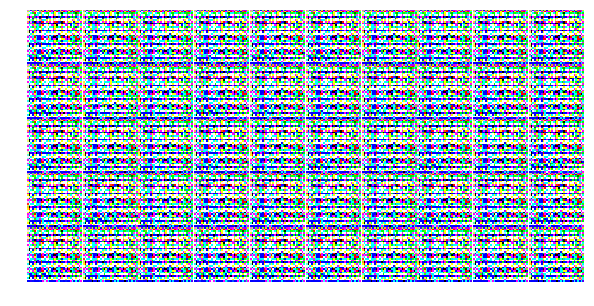

In [20]:
dataset = Dataset(trainset, testset)

batch_size = 2
epochs = 60
train_accuracies, test_accuracies, samples = train(net, dataset, epochs, batch_size, figsize=(10,5), load=True)

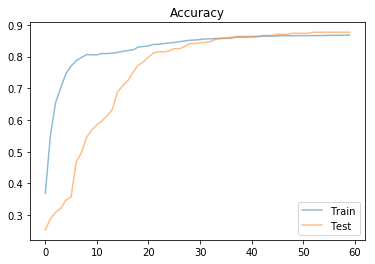

In [21]:
fig, ax = plt.subplots()
plt.plot(train_accuracies, label='Train', alpha=0.5)
plt.plot(test_accuracies, label='Test', alpha=0.5)
plt.title("Accuracy")
plt.legend()

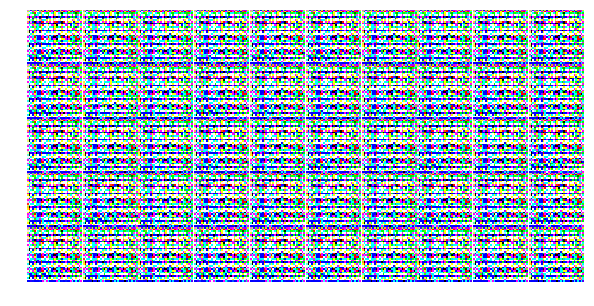

In [22]:
_ = view_samples(-1, samples, 5, 10, figsize=(10,5))

# Making Predictions

In [23]:
# prediction function
label = ['red', 'yellow', 'green', '', 'unknown']
import os
def prediction(image_file):
    
    # load color (BGR) image
    img = cv2.imread(image_file)

    # convert BGR image to RGB for plotting
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
    sess = tf.Session()
    saver = tf.train.import_meta_graph('./checkpoints/generator.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./checkpoints/'))
    graph = tf.get_default_graph()
    input_real = graph.get_tensor_by_name("input_real:0")
    drop_rate = graph.get_tensor_by_name("drop_rate:0")
    predict = graph.get_tensor_by_name("predict:0")

    predict = sess.run(predict, feed_dict = {
        input_real: scale(img.reshape(-1, 600, 800, 3)),
        drop_rate:0.})
        
    # display the image and prediction
    fg, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.text(.5, .5, 'Most Likely: %s'%(label[predict[0]]), fontsize=12, horizontalalignment='center', verticalalignment='center')
    ax1.set_axis_off()
    ax2.set_title('Prediction')
    ax2.imshow(img)
    plt.show()

INFO:tensorflow:Restoring parameters from ./checkpoints/generator.ckpt


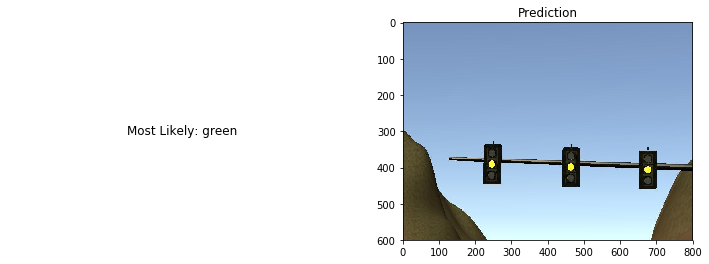

In [24]:
prediction('../../data/collections/mysample05/session1_9.jpg')

INFO:tensorflow:Restoring parameters from ./checkpoints/generator.ckpt


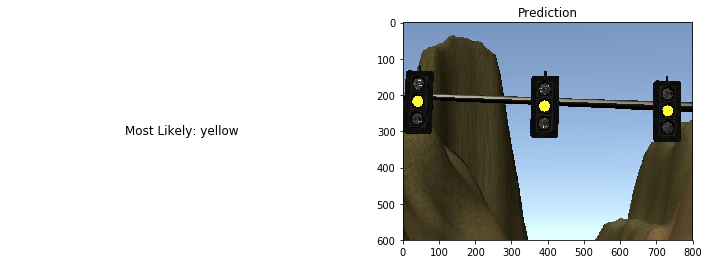

In [25]:
prediction('../../data/collections/mysample05/session1_21.jpg')

INFO:tensorflow:Restoring parameters from ./checkpoints/generator.ckpt


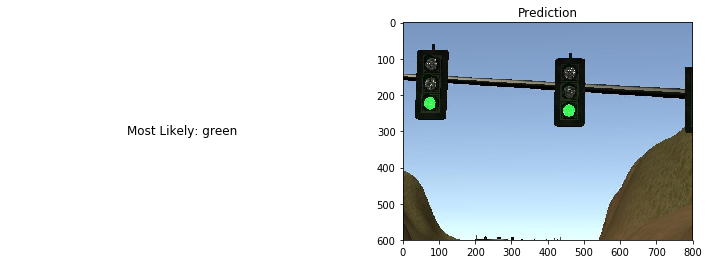

In [26]:
prediction('../../data/collections/mysample02/session2_100.jpg')

INFO:tensorflow:Restoring parameters from ./checkpoints/generator.ckpt


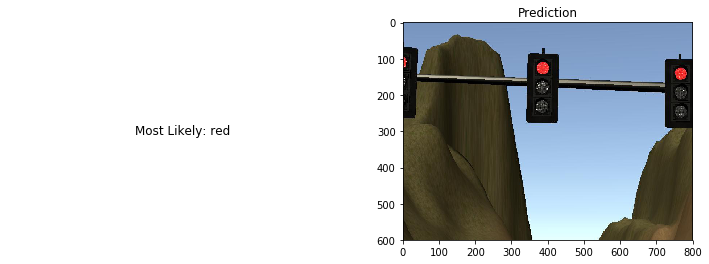

In [27]:
prediction('../../data/collections/new_sim/session2_271.jpg')

INFO:tensorflow:Restoring parameters from ./checkpoints/generator.ckpt


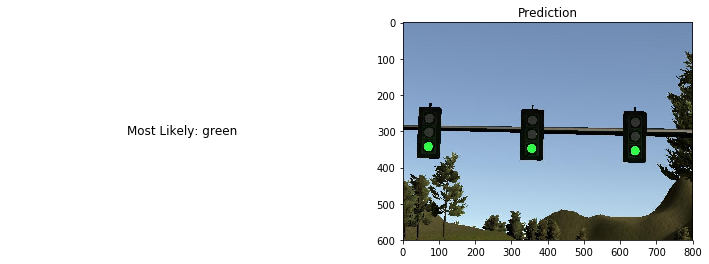

In [28]:
prediction('../../data/collections/mysample05/session1_201.jpg')